# Релизуйте свой классификатор KNN

### Импорты

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from math import sqrt
%matplotlib inline

### Реализуйте класс MyKNeighborsClassifier (6 баллов)

1. (3 балла) Реализован класс с параметрами по умолчанию
2. (1 балл) Реализовано манхетенское расстояние `(metric='manhattan')`
3. (2 балла) Реализованы веса, зависящие от растояния `(weights='distance')`



In [ ]:
class MyKNeighborsClassifier:
  def __init__(self, n_neighbours: int = 5, weights: str = "uniform", metric: str = "euclidean"):
    if metric not in ["manhattan", "euclidean"]:
      raise ValueError("This type of metric is not supported: {}".format(metric))
    if weights not in ["uniform", "distance"]:
      raise ValueError("This type of weights is not supported: {}".format(weights))
    
    self.n_neighbours = n_neighbours
    self.weights = weights
    self.metric = metric

    self.X = None
    self.y = None

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    self.X = X
    self.y = y

  def predict(self, X: np.ndarray) -> np.ndarray:
    distances = []
    for x in X:
      x_discances = []
      for i in range(len(self.X)):
        if self.metric == 'euclidean':
          x_discances.append((sqrt((x[0] - self.X[i][0])**2 + (x[1] - self.X[i][1])**2), self.y[i]))
        elif self.metric == 'manhattan':
          x_discances.append((abs(x[0] - self.X[i][0]) + abs(x[1] - self.X[i][1]), self.y[i]))
      distances.append(sorted(x_discances)[:self.n_neighbours])

    self.predictions = []
    for distance in distances:
      classes = [0]*len(list(set(self.y)))
      for i in distance:
        if self.weights == "uniform":
          classes[i[1]] += 1
        elif self.weights == "distance":
          classes[i[1]] += 1/i[0]
        
      self.predictions.append(classes.index(max(classes)))
    return np.array(self.predictions)

### Проверьте решение на датасете и сравните с kNeighborsClassifier из sklearn (4 балла)
1. (1 балл) Выведите accuracy_score для вашего решения и для решения из sklearn, посчитайте в 4 вариациях (Должно получиться 8 чисел)
  1. Параметры по умолчанию
  2. `weights='distance'`
  3. `metric='manhattan'`
  4. `weights='distance'`, `metric='manhattan'`
2. (2 балла) Переберите параметр k от 1 до 10 для каждой модели из пункта выше (получится 4 графика по две линии на каждом)
  1. Переберите параметр, каждый раз обучайте модель
  2. Выведите график зависимости `accuracy` от `k`
  3. На этом же графике выведите пунктирной линией такую же зависимость для модели из sklearn
3. (3 балла) Напишите вывод, сравнение всего, что получилось – получилось ли у вас достичь таких же результатов, как в sklearn, как на результат влияют параметры, какая модель и с какими параметрами оказалась лучшей.



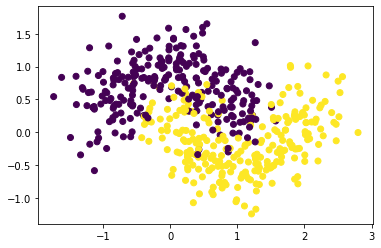

In [ ]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def diagram(knn_accuracy, my_knn_accuracy):
  plt.figure(figsize=(10, 6))
  plt.plot(np.linspace(1, 10, 10), knn_accuracy, label='sklearn knn')
  plt.plot(np.linspace(1, 10, 10), my_knn_accuracy, '--', label='my knn')
  plt.title('Сравнение алгоритмов')
  plt.ylabel('accuracy')
  plt.xlabel('k')
  plt.legend()
  plt.show()

# Сравнения Моделей


#### Параметры по умолчанию

In [ ]:
#Параметры по умолчанию
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'knn accuracy: {accuracy_score(y_test, y_pred)}')
my_knn = MyKNeighborsClassifier()
my_knn.fit(X_train, y_train)
my_y_pred = my_knn.predict(X_test)
print(f'my_knn accuracy: {accuracy_score(y_test, my_y_pred)}')

knn accuracy: 0.89
my_knn accuracy: 0.89


In [ ]:
knn_accuracy, my_knn_accuracy = [], []
for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  knn_accuracy.append(accuracy_score(y_test, y_pred))
  my_knn = MyKNeighborsClassifier(n_neighbours = k)
  my_knn.fit(X_train, y_train)
  my_y_pred = my_knn.predict(X_test)
  my_knn_accuracy.append(accuracy_score(y_test, my_y_pred))

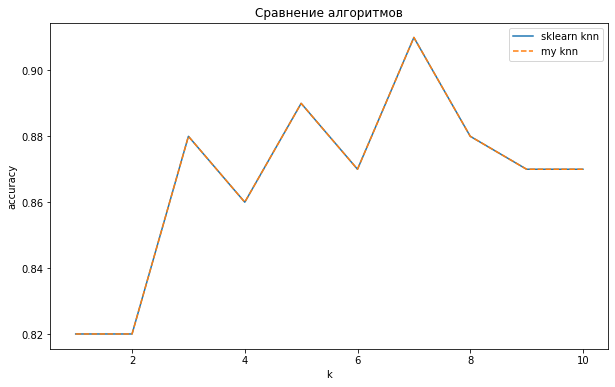

In [ ]:
diagram(knn_accuracy, my_knn_accuracy)

####weights='distance'

In [ ]:
#weights='distance'
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'knn accuracy: {accuracy_score(y_test, y_pred)}')
my_knn = MyKNeighborsClassifier(weights='distance')
my_knn.fit(X_train, y_train)
my_y_pred = my_knn.predict(X_test)
print(f'my_knn accuracy: {accuracy_score(y_test, my_y_pred)}')

knn accuracy: 0.87
my_knn accuracy: 0.87


In [ ]:
knn_accuracy, my_knn_accuracy = [], []
for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors = k, weights='distance')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  knn_accuracy.append(accuracy_score(y_test, y_pred))
  my_knn = MyKNeighborsClassifier(n_neighbours = k, weights='distance')
  my_knn.fit(X_train, y_train)
  my_y_pred = my_knn.predict(X_test)
  my_knn_accuracy.append(accuracy_score(y_test, my_y_pred))


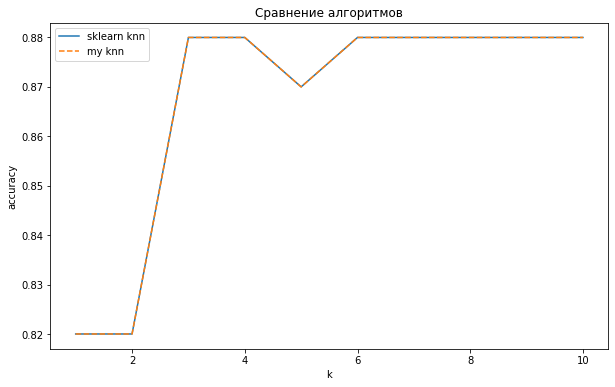

In [ ]:
diagram(knn_accuracy, my_knn_accuracy)

####metric='manhattan'

In [ ]:
#metric='manhattan'
knn = KNeighborsClassifier(metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'knn accuracy: {accuracy_score(y_test, y_pred)}')
my_knn = MyKNeighborsClassifier(metric='manhattan')
my_knn.fit(X_train, y_train)
my_y_pred = my_knn.predict(X_test)
print(f'my_knn accuracy: {accuracy_score(y_test, my_y_pred)}')

knn accuracy: 0.92
my_knn accuracy: 0.92


In [ ]:
knn_accuracy, my_knn_accuracy = [], []
for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  knn_accuracy.append(accuracy_score(y_test, y_pred))
  my_knn = MyKNeighborsClassifier(n_neighbours = k, metric='manhattan')
  my_knn.fit(X_train, y_train)
  my_y_pred = my_knn.predict(X_test)
  my_knn_accuracy.append(accuracy_score(y_test, my_y_pred))

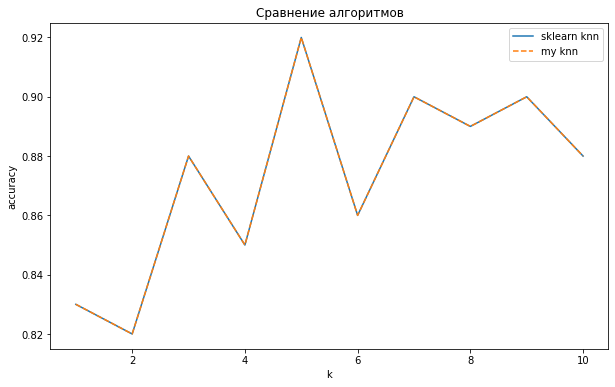

In [ ]:
diagram(knn_accuracy, my_knn_accuracy)

####weights='distance', metric='manhattan'

In [ ]:
#weights='distance', metric='manhattan'
knn = KNeighborsClassifier(weights='distance', metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'knn accuracy: {accuracy_score(y_test, y_pred)}')
my_knn = MyKNeighborsClassifier(weights='distance', metric='manhattan')
my_knn.fit(X_train, y_train)
my_y_pred = my_knn.predict(X_test)
print(f'my_knn accuracy: {accuracy_score(y_test, my_y_pred)}')

knn accuracy: 0.88
my_knn accuracy: 0.88


In [ ]:
knn_accuracy, my_knn_accuracy = [], []
for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors = k, weights='distance', metric='manhattan')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  knn_accuracy.append(accuracy_score(y_test, y_pred))
  my_knn = MyKNeighborsClassifier(n_neighbours = k, weights='distance', metric='manhattan')
  my_knn.fit(X_train, y_train)
  my_y_pred = my_knn.predict(X_test)
  my_knn_accuracy.append(accuracy_score(y_test, my_y_pred))

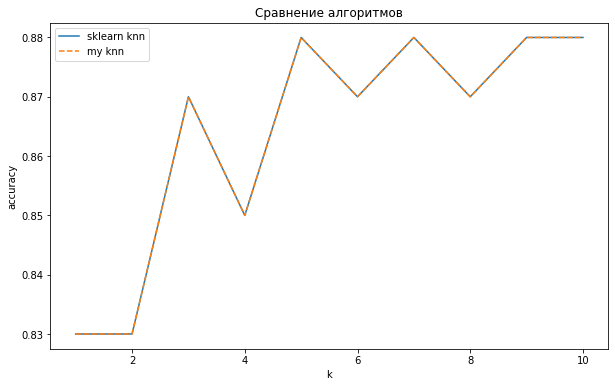

In [ ]:
diagram(knn_accuracy, my_knn_accuracy)

#Вывод
Моя реализация knn показала такие же результаты, как и модель из sklearn. 

Лучший результат показала модель с параметрами (k = 5, metric='manhattan'), ее accuracy составил 0.92
